# Peak position analysis

We can get a robust understanding of peak position shifts by essentially doing quantitative analyses at different spectrometer positions. 

We can't simply do wavelength scans because of (a) nitrogen mobilisation and (b) the need to consider the curved background. That is, if your beam conditions are so gentle as to avoid nitrogen mobilisation, you will struggle to get good enough data across a wide enough range of wavelenths to fit a robust background and correct the analysis.

So instead, we use the quantitative analysis protocol with the four-point background method.

Measure at various spectrometer positions (several each to get uncertainty) and use the four-point background to correct the k-ratio. Then plot the corrected k-ratio against spectrometer position.

# Buddingtonite

## 1. Fit wavelength scans to obtain background shape

The first step does involve wavelength scans - but these are only used for background shape and nitrogen mobilisation is not a concern.

In [1]:
import sys
sys.path.insert(1, "..")
from src import wdscan, readfiles, correct_quant
from pathlib import Path
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd
np.random.seed(42)

For this sample we have several background scans. We'll fit them all simultaneously to get better fit parameters.

In [2]:
raw_data_path = Path('../data/raw/peak_positions/buddingtonite_StA/raw_wd_scans/')
scans = sorted(f for f in raw_data_path.glob('*') if f.stem[0] != '.') #Find all folders except hidden ones

metadata_list = []
data_list = []

for s in scans:
    print(f"---------------- {s} ----------------")
    
    # Read in the data
    comments, data, metadata = readfiles.import_jeol_wdscans(
        subfolder=s,
        scan_filename=f'data001_mm.csv',
        cnd_filename=f'data001.cnd',
        comment_line_num=80,
        crystal_line_name="$XM_WDS_CRYSTAL_NAME%0",
        sep=',',
        return_metadata=True
    )

    metadata_list.append(metadata)
    data_list.append(data)



---------------- ..\data\raw\peak_positions\buddingtonite_StA\raw_wd_scans\buddingtonite_bg_scan1 ----------------
---------------- ..\data\raw\peak_positions\buddingtonite_StA\raw_wd_scans\buddingtonite_bg_scan2 ----------------
---------------- ..\data\raw\peak_positions\buddingtonite_StA\raw_wd_scans\buddingtonite_bg_scan3 ----------------
---------------- ..\data\raw\peak_positions\buddingtonite_StA\raw_wd_scans\Pos_0001 ----------------


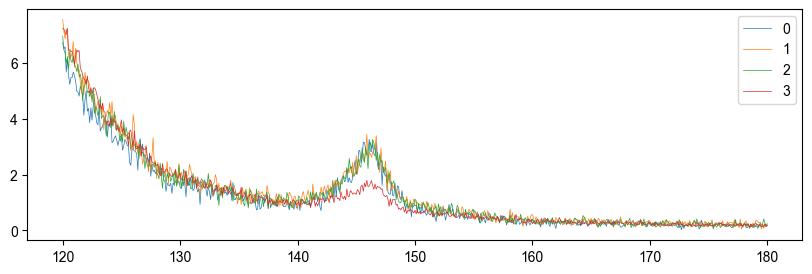

In [3]:
fig, ax = plt.subplots(ncols=1, figsize=(10, 3))
for i in range(len(data_list)):
    ax.plot(data_list[i].L, data_list[i].cps_per_nA, label=i, lw=0.5)
plt.legend()


These are all very similar, and I'm going to fit them together. The differences in the peak height doesn't matter, we're only interest in background shape.

Note: the 'fit scans together' method assumes that all fits can be made with the same centre and sigma parameters. Amplitude and constant are allowed to vary, because the magnitude isn't important here, we're concerened only with the shape.

In [4]:
result, trimmed_data = wdscan.fit_scans_together(
    data = data_list,
    fit_regions = [[120, 140], [152, 180]],
    path_out = Path("../data/interim/peak_positions/buddingtonite_StA/fits")
)

Performing the fit...
Saved fit parameters to ..\data\interim\peak_positions\buddingtonite_StA\fits


Saved figure showing fit to buddingtonite_bg_scan1 in folder "..\data\interim\peak_positions\buddingtonite_StA\fits"
Saved figure showing fit to buddingtonite_bg_scan2 in folder "..\data\interim\peak_positions\buddingtonite_StA\fits"
Saved figure showing fit to buddingtonite_bg_scan3 in folder "..\data\interim\peak_positions\buddingtonite_StA\fits"
Saved figure showing fit to Pos_0001 in folder "..\data\interim\peak_positions\buddingtonite_StA\fits"


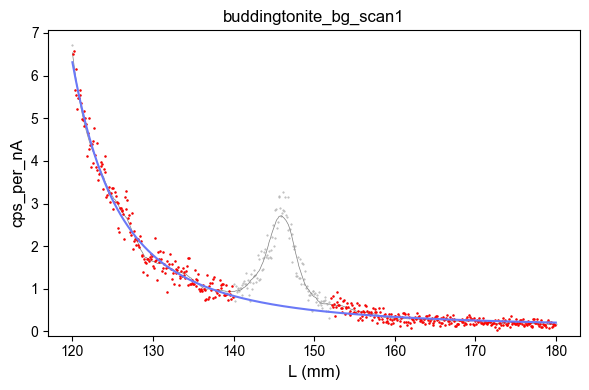

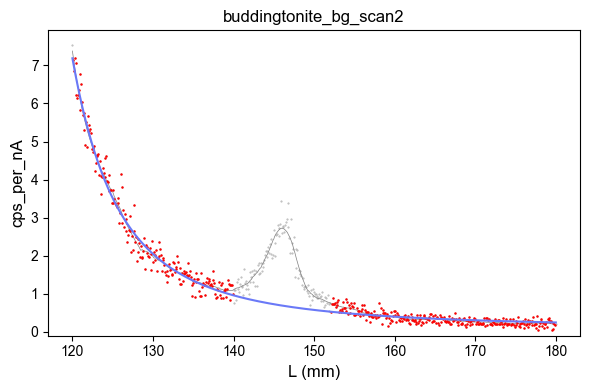

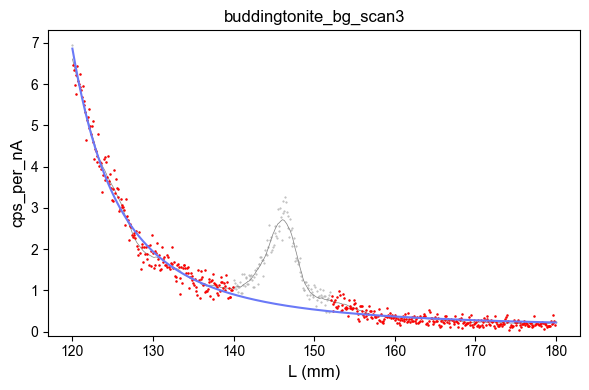

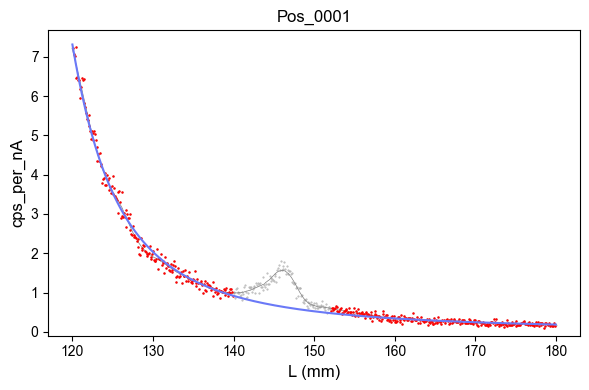

In [5]:
wdscan.plot_fits_together(
    data=data_list,
    trimmed_data=trimmed_data,
    result=result,
    comments=[s.stem for s in scans],
    path_out=Path("../data/interim/peak_positions/buddingtonite_StA/fits")
    )

The fits look good. All four scans can be fit well with the same sigma and center parameters, which gives us confidence in those derived parameters.

## 2. Correct quantitative analyses

In [8]:
samples = ['buddingtonite'] # List of samples in this dataset
raw_data_path = Path('../data/raw/peak_positions/buddingtonite_StA/raw_quant/')
samples = [p.stem for p in raw_data_path.glob('[!.]*')]
sample_folders = [raw_data_path / s for s in samples]
category = 'buddingtonite' # Category of this dataset (e.g. "glasses")

wd_scan = Path('../data/interim/peak_positions/buddingtonite_StA/fits/key_params.txt') # Path to wd scan fit parameters
std_dbase_info_file = Path('../data/_dictionaries/standards.csv')

In [9]:
datalist = readfiles.find_files_and_folders(
                samples, sample_folders,
                apf_file=None, # APF correction is not required
                wd_scan=wd_scan)

datalist

Comments found: ['budd_10nA_30s_03um_145.8mm_BNcalibr_01', 'budd_10nA_30s_03um_145.8mm_BNcalibr_02', 'budd_10nA_30s_03um_145.8mm_BNcalibr_03', 'budd_10nA_30s_03um_145.8mm_BNcalibr_04']
Comments found: ['budd_10nA_30s_03um_146.4mm_BNcalibr_01', 'budd_10nA_30s_03um_146.4mm_BNcalibr_02', 'budd_10nA_30s_03um_146.4mm_BNcalibr_03', 'budd_10nA_30s_03um_146.4mm_BNcalibr_04', 'budd_10nA_30s_03um_146.4mm_BNcalibr_05', 'budd_10nA_30s_03um_146.4mm_BNcalibr_06']
Comments found: ['budd_10nA_30s_03um_146.6mm_BNcalibr_01', 'budd_10nA_30s_03um_146.6mm_BNcalibr_02', 'budd_10nA_30s_03um_146.6mm_BNcalibr_03', 'budd_10nA_30s_03um_146.6mm_BNcalibr_04', 'budd_10nA_30s_03um_146.6mm_BNcalibr_05', 'budd_10nA_30s_03um_146.6mm_BNcalibr_06']
Comments found: ['budd_10nA_30s_03um_147.6mm_BNcalibr_01', 'budd_10nA_30s_03um_147.6mm_BNcalibr_02', 'budd_10nA_30s_03um_147.6mm_BNcalibr_03', 'budd_10nA_30s_03um_147.6mm_BNcalibr_04']
Comments found: ['budd_10nA_30s_05um_146.7mm_BNcalibr_04', 'budd_10nA_30s_03um_146.7mm_BNcal

,folder,comment,sample,paramfile,apf,apf_sd
0,..\data\raw\peak_positions\buddingtonite_StA\r...,budd_10nA_30s_03um_145.8mm_BNcalibr_01,"buddingtonite_145,8",..\data\interim\peak_positions\buddingtonite_S...,1,0.0
1,..\data\raw\peak_positions\buddingtonite_StA\r...,budd_10nA_30s_03um_145.8mm_BNcalibr_02,"buddingtonite_145,8",..\data\interim\peak_positions\buddingtonite_S...,1,0.0
2,..\data\raw\peak_positions\buddingtonite_StA\r...,budd_10nA_30s_03um_145.8mm_BNcalibr_03,"buddingtonite_145,8",..\data\interim\peak_positions\buddingtonite_S...,1,0.0
3,..\data\raw\peak_positions\buddingtonite_StA\r...,budd_10nA_30s_03um_145.8mm_BNcalibr_04,"buddingtonite_145,8",..\data\interim\peak_positions\buddingtonite_S...,1,0.0
4,..\data\raw\peak_positions\buddingtonite_StA\r...,budd_10nA_30s_03um_146.4mm_BNcalibr_01,"buddingtonite_146,4",..\data\interim\peak_positions\buddingtonite_S...,1,0.0
5,..\data\raw\peak_positions\buddingtonite_StA\r...,budd_10nA_30s_03um_146.4mm_BNcalibr_02,"buddingtonite_146,4",..\data\interim\peak_positions\buddingtonite_S...,1,0.0
6,..\data\raw\peak_positions\buddingtonite_StA\r...,budd_10nA_30s_03um_146.4mm_BNcalibr_03,"buddingtonite_146,4",..\data\interim\peak_positions\buddingtonite_S...,1,0.0
7,..\data\raw\peak_positions\buddingtonite_StA\r...,budd_10nA_30s_03um_146.4mm_BNcalibr_04,"buddingtonite_146,4",..\data\interim\peak_positions\buddingtonite_S...,1,0.0
8,..\data\raw\peak_positions\buddingtonite_StA\r...,budd_10nA_30s_03um_146.4mm_BNcalibr_05,"buddingtonite_146,4",..\data\interim\peak_positions\buddingtonite_S...,1,0.0
9,..\data\raw\peak_positions\buddingtonite_StA\r...,budd_10nA_30s_03um_146.4mm_BNcalibr_06,"buddingtonite_146,4",..\data\interim\peak_positions\buddingtonite_S...,1,0.0


In [12]:
myspot = [None] * len(datalist.folder)

for i in range(len(datalist.folder)):
    peak, bg, standard, info = readfiles.read_and_organise_data(
                                    datalist.loc[i,:].copy(),
                                    bgi=False,
                                    save=False)
    myspot[i] = correct_quant.Spot()
    myspot[i].add_data(info, bg, peak, standard)
    myspot[i].add_wd_scan_params_from_file(wd_scan)
    print('Read dataset:', i + 1, 'of', len(datalist), ':',
          myspot[i].info.comment)
    myspot[i].comprehensify_data()


 loading path: ..\data\interim\peak_positions\buddingtonite_StA\fits\key_params.txt
{'sigma': 5.384898363600538, 'center': 111.35357882717497}
Read dataset: 1 of 35 : budd_10nA_30s_03um_145.8mm_BNcalibr_01

 loading path: ..\data\interim\peak_positions\buddingtonite_StA\fits\key_params.txt
{'sigma': 5.384898363600538, 'center': 111.35357882717497}
Read dataset: 2 of 35 : budd_10nA_30s_03um_145.8mm_BNcalibr_02

 loading path: ..\data\interim\peak_positions\buddingtonite_StA\fits\key_params.txt
{'sigma': 5.384898363600538, 'center': 111.35357882717497}
Read dataset: 3 of 35 : budd_10nA_30s_03um_145.8mm_BNcalibr_03

 loading path: ..\data\interim\peak_positions\buddingtonite_StA\fits\key_params.txt
{'sigma': 5.384898363600538, 'center': 111.35357882717497}
Read dataset: 4 of 35 : budd_10nA_30s_03um_145.8mm_BNcalibr_04

 loading path: ..\data\interim\peak_positions\buddingtonite_StA\fits\key_params.txt
{'sigma': 5.384898363600538, 'center': 111.35357882717497}
Read dataset: 5 of 35 : budd

In [13]:
correct_quant.process_datasets(myspot, datalist, num_mc_sims=100, path_out=Path("../data/processed/peak_positions/buddingtonite_StA/background_corrections/"))


Processing dataset: 1 of 35 : budd_10nA_30s_03um_145.8mm_BNcalibr_01
Correcting background
Saved bg correction figure for 2021-12-01_budd_10nA_30s_03um_145-8mm_BNcalibr_01
Resample cps to check stdev method
Montecarlo background correction
monte-carlo loop 0 of 100
monte-carlo loop 50 of 100
Saved montecarlo bg correction figure for 2021-12-01_budd_10nA_30s_03um_145.8mm_BNcalibr_01
correct height/area ratio
original kraw: 5.35 ± 4.54%
corrected kraw: 6.18 ± 4.19%

Processing dataset: 2 of 35 : budd_10nA_30s_03um_145.8mm_BNcalibr_02
Correcting background
Saved bg correction figure for 2021-12-01_budd_10nA_30s_03um_145-8mm_BNcalibr_02
Resample cps to check stdev method
Montecarlo background correction
monte-carlo loop 0 of 100
monte-carlo loop 50 of 100
Saved montecarlo bg correction figure for 2021-12-01_budd_10nA_30s_03um_145.8mm_BNcalibr_02
correct height/area ratio
original kraw: 5.08 ± 4.67%
corrected kraw: 5.87 ± 3.45%

Processing dataset: 3 of 35 : budd_10nA_30s_03um_145.8mm_BNca

In [14]:
summary_tables = correct_quant.write_summary_excel_tables(myspot, "../data/processed/peak_positions/buddingtonite_StA/kraw_summaries.xlsx")

In [15]:
# Write the spot objects out to a pickle file:
with open('../data/interim/peak_positions/buddingtonite_StA/buddingtonite.pickle', 'wb') as handle:
    pickle.dump(myspot, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Glass D2872

## 1. Fit wavelength scans to obtain background shape

For this sample we have several background scans. We'll fit them all simultaneously to get better fit parameters.

In [16]:
raw_data_path = Path('../data/raw/peak_positions/D2872_StA/raw_wd_scans/')
scans = sorted(f for f in raw_data_path.glob('*') if f.stem[0] != '.') #Find all folders except hidden ones

metadata_list = []
data_list = []

for s in scans:
    print(f"---------------- {s} ----------------")
    
    # Read in the data
    comments, data, metadata = readfiles.import_jeol_wdscans(
        subfolder=s,
        scan_filename=f'data001_mm.csv',
        cnd_filename=f'data001.cnd',
        comment_line_num=80,
        crystal_line_name="$XM_WDS_CRYSTAL_NAME%0",
        sep=',',
        return_metadata=True
    )

    metadata_list.append(metadata)
    data_list.append(data)


---------------- ..\data\raw\peak_positions\D2872_StA\raw_wd_scans\Pos_0001 ----------------
---------------- ..\data\raw\peak_positions\D2872_StA\raw_wd_scans\Pos_0002 ----------------
---------------- ..\data\raw\peak_positions\D2872_StA\raw_wd_scans\Pos_0003 ----------------


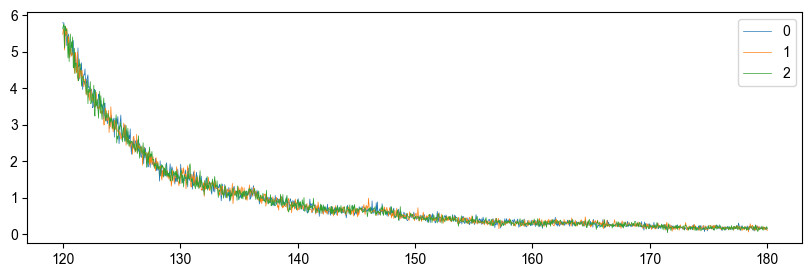

In [17]:
fig, ax = plt.subplots(ncols=1, figsize=(10, 3))
for i in range(len(data_list)):
    ax.plot(data_list[i].L, data_list[i].cps_per_nA, label=i, lw=0.5)
plt.legend()


Again - let's fit these three scans simulatenously to better define sigma and centre

In [19]:
result, trimmed_data = wdscan.fit_scans_together(
    data = data_list,
    fit_regions = [[120, 140], [152, 180]],
    path_out = Path("../data/interim/peak_positions/D2872_StA/fits")
)

Performing the fit...
Saved fit parameters to ..\data\interim\peak_positions\D2872_StA\fits


Saved figure showing fit to Pos_0001 in folder "..\data\interim\peak_positions\D2872_StA\fits"
Saved figure showing fit to Pos_0002 in folder "..\data\interim\peak_positions\D2872_StA\fits"
Saved figure showing fit to Pos_0003 in folder "..\data\interim\peak_positions\D2872_StA\fits"


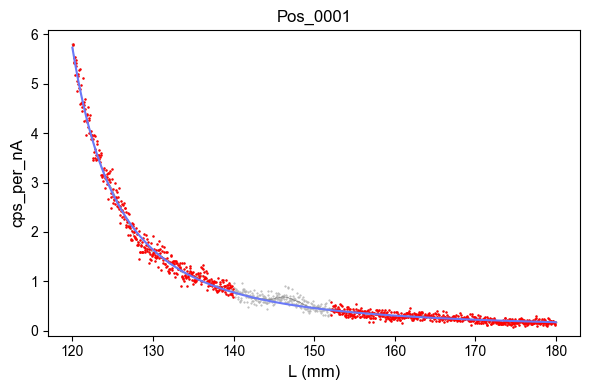

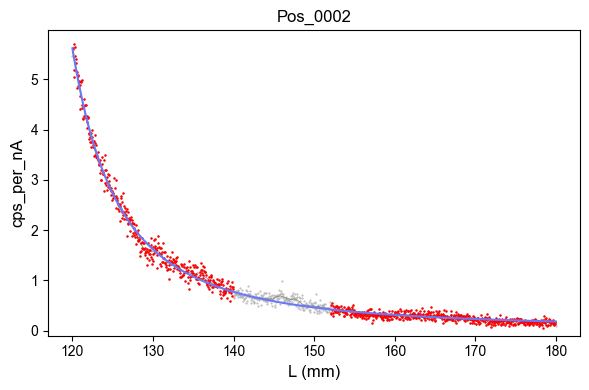

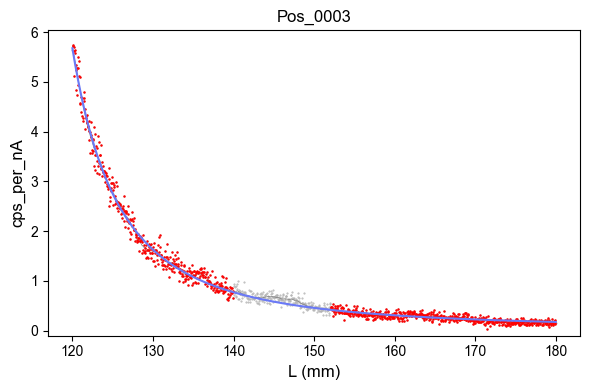

In [20]:
wdscan.plot_fits_together(
    data=data_list,
    trimmed_data=trimmed_data,
    result=result,
    comments=[s.stem for s in scans],
    path_out=Path("../data/interim/peak_positions/D2872_StA/fits")
    )

The fits look good. All four scans can be fit well with the same sigma and center parameters, which gives us confidence in those derived parameters.

## 2. Correct quantitative analyses

In [24]:
samples = ['D2872'] # List of samples in this dataset
raw_data_path = Path('../data/raw/peak_positions/D2872_StA/raw_quant/')
samples = [p.stem for p in raw_data_path.glob('[!.]*')]
sample_folders = [raw_data_path / s for s in samples]
category = 'D2872' # Category of this dataset (e.g. "glasses")

wd_scan = Path('../data/interim/peak_positions/D2872_StA/fits/key_params.txt') # Path to wd scan fit parameters
std_dbase_info_file = Path('../data/_dictionaries/standards.csv')

In [25]:
datalist = readfiles.find_files_and_folders(
                samples, sample_folders,
                apf_file=None, # APF correction is not required
                wd_scan=wd_scan)

datalist

Comments found: ['D2872_50nA_20um_145.0_1', 'D2872_50nA_20um_145.0_2', 'D2872_50nA_20um_145.0_3', 'D2872_50nA_20um_145.0_4', 'D2872_50nA_20um_145.0_5']
Comments found: ['D2872_50nA_20um_145.2_1', 'D2872_50nA_20um_145.2_2', 'D2872_50nA_20um_145.2_3', 'D2872_50nA_20um_145.2_4', 'D2872_50nA_20um_145.2_5']
Comments found: ['D2872_50nA_20um_145.4_1', 'D2872_50nA_20um_145.4_2', 'D2872_50nA_20um_145.4_3', 'D2872_50nA_20um_145.4_4', 'D2872_50nA_20um_145.4_5']
Comments found: ['D2872_50nA_20um_145.6_1', 'D2872_50nA_20um_145.6_2', 'D2872_50nA_20um_145.6_3', 'D2872_50nA_20um_145.6_4', 'D2872_50nA_20um_145.6_5']
Comments found: ['D2872_50nA_20um_145.8_1', 'D2872_50nA_20um_145.8_2', 'D2872_50nA_20um_145.8_3', 'D2872_50nA_20um_145.8_4', 'D2872_50nA_20um_145.8_5']
Comments found: ['D2872_50nA_20um_146.0_1', 'D2872_50nA_20um_146.0_2', 'D2872_50nA_20um_146.0_3', 'D2872_50nA_20um_146.0_4', 'D2872_50nA_20um_146.0_5']
Comments found: ['D2872_50nA_20um_146.2_1', 'D2872_50nA_20um_146.2_2', 'D2872_50nA_20um_

,folder,comment,sample,paramfile,apf,apf_sd
0,..\data\raw\peak_positions\D2872_StA\raw_quant...,D2872_50nA_20um_145.0_1,"D2872_50nA_20um_90s_145,0",..\data\interim\peak_positions\D2872_StA\fits\...,1,0.0
1,..\data\raw\peak_positions\D2872_StA\raw_quant...,D2872_50nA_20um_145.0_2,"D2872_50nA_20um_90s_145,0",..\data\interim\peak_positions\D2872_StA\fits\...,1,0.0
2,..\data\raw\peak_positions\D2872_StA\raw_quant...,D2872_50nA_20um_145.0_3,"D2872_50nA_20um_90s_145,0",..\data\interim\peak_positions\D2872_StA\fits\...,1,0.0
3,..\data\raw\peak_positions\D2872_StA\raw_quant...,D2872_50nA_20um_145.0_4,"D2872_50nA_20um_90s_145,0",..\data\interim\peak_positions\D2872_StA\fits\...,1,0.0
4,..\data\raw\peak_positions\D2872_StA\raw_quant...,D2872_50nA_20um_145.0_5,"D2872_50nA_20um_90s_145,0",..\data\interim\peak_positions\D2872_StA\fits\...,1,0.0
5,..\data\raw\peak_positions\D2872_StA\raw_quant...,D2872_50nA_20um_145.2_1,"D2872_50nA_20um_90s_145,2",..\data\interim\peak_positions\D2872_StA\fits\...,1,0.0
6,..\data\raw\peak_positions\D2872_StA\raw_quant...,D2872_50nA_20um_145.2_2,"D2872_50nA_20um_90s_145,2",..\data\interim\peak_positions\D2872_StA\fits\...,1,0.0
7,..\data\raw\peak_positions\D2872_StA\raw_quant...,D2872_50nA_20um_145.2_3,"D2872_50nA_20um_90s_145,2",..\data\interim\peak_positions\D2872_StA\fits\...,1,0.0
8,..\data\raw\peak_positions\D2872_StA\raw_quant...,D2872_50nA_20um_145.2_4,"D2872_50nA_20um_90s_145,2",..\data\interim\peak_positions\D2872_StA\fits\...,1,0.0
9,..\data\raw\peak_positions\D2872_StA\raw_quant...,D2872_50nA_20um_145.2_5,"D2872_50nA_20um_90s_145,2",..\data\interim\peak_positions\D2872_StA\fits\...,1,0.0


In [26]:
myspot = [None] * len(datalist.folder)

for i in range(len(datalist.folder)):
    peak, bg, standard, info = readfiles.read_and_organise_data(
                                    datalist.loc[i,:].copy(),
                                    bgi=False,
                                    save=False)
    myspot[i] = correct_quant.Spot()
    myspot[i].add_data(info, bg, peak, standard)
    myspot[i].add_wd_scan_params_from_file(wd_scan)
    print('Read dataset:', i + 1, 'of', len(datalist), ':',
          myspot[i].info.comment)
    myspot[i].comprehensify_data()


 loading path: ..\data\interim\peak_positions\D2872_StA\fits\key_params.txt
{'sigma': 0.09339156580777663, 'center': 108.64769429521013}
Read dataset: 1 of 50 : D2872_50nA_20um_145.0_1

 loading path: ..\data\interim\peak_positions\D2872_StA\fits\key_params.txt
{'sigma': 0.09339156580777663, 'center': 108.64769429521013}
Read dataset: 2 of 50 : D2872_50nA_20um_145.0_2

 loading path: ..\data\interim\peak_positions\D2872_StA\fits\key_params.txt
{'sigma': 0.09339156580777663, 'center': 108.64769429521013}
Read dataset: 3 of 50 : D2872_50nA_20um_145.0_3

 loading path: ..\data\interim\peak_positions\D2872_StA\fits\key_params.txt
{'sigma': 0.09339156580777663, 'center': 108.64769429521013}
Read dataset: 4 of 50 : D2872_50nA_20um_145.0_4

 loading path: ..\data\interim\peak_positions\D2872_StA\fits\key_params.txt
{'sigma': 0.09339156580777663, 'center': 108.64769429521013}
Read dataset: 5 of 50 : D2872_50nA_20um_145.0_5

 loading path: ..\data\interim\peak_positions\D2872_StA\fits\key_para

In [27]:
correct_quant.process_datasets(myspot, datalist, num_mc_sims=100, path_out=Path("../data/processed/peak_positions/D2872_StA/background_corrections/"))


Processing dataset: 1 of 50 : D2872_50nA_20um_145.0_1
Correcting background
Saved bg correction figure for 2021-11-18_D2872_50nA_20um_145-0_1
Resample cps to check stdev method
Montecarlo background correction
monte-carlo loop 0 of 100
monte-carlo loop 50 of 100
Saved montecarlo bg correction figure for 2021-11-18_D2872_50nA_20um_145.0_1
correct height/area ratio
original kraw: 0.00 ± 100.00%
corrected kraw: 0.71 ± 15.90%

Processing dataset: 2 of 50 : D2872_50nA_20um_145.0_2
Correcting background
Saved bg correction figure for 2021-11-18_D2872_50nA_20um_145-0_2
Resample cps to check stdev method
Montecarlo background correction
monte-carlo loop 0 of 100
monte-carlo loop 50 of 100
Saved montecarlo bg correction figure for 2021-11-18_D2872_50nA_20um_145.0_2
correct height/area ratio
original kraw: 0.00 ± 100.00%
corrected kraw: 0.58 ± 19.64%

Processing dataset: 3 of 50 : D2872_50nA_20um_145.0_3
Correcting background
Saved bg correction figure for 2021-11-18_D2872_50nA_20um_145-0_3
Res

In [28]:
summary_tables = correct_quant.write_summary_excel_tables(myspot, "../data/processed/peak_positions/D2872_StA/kraw_summaries.xlsx")

In [30]:
# Write the spot objects out to a pickle file:
with open('../data/interim/peak_positions/D2872_StA/D2872.pickle', 'wb') as handle:
    pickle.dump(myspot, handle, protocol=pickle.HIGHEST_PROTOCOL)